# MSDS 7331 - Lab Three: Clustering, Association Rules, or Recommenders

### Investigators
- [Matt Baldree](mailto:mbaldree@smu.edu?subject=lab2)
- [Ben Brock](bbrock@smu.edu?subject=lab2)
- [Tom Elkins](telkins@smu.edu?subject=lab2)
- [Austin Kelly](ajkelly@smu.edu?subject=lab2)

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>CRISP-DM Capstone: Association Rule Mining, Clustering, or Collaborative Filtering</h3>
    <h3>Lab Instructions</h3>
    <p>In the final assignment for this course, you will be using one of three different analysis methods:</p>
    <ul>
    <li>Option A: Use transaction data for mining associations rules</li>
    <li>Option B: Use clustering on an unlabeled dataset to provide insight or features</li>
    <li>Option C: Use collaborative filtering to build a custom recommendation system</li>
    </ul>
    <p>This report is worth 20% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a single document. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.</p>
    <p>Your choice of dataset will largely determine the task that you are trying to achieve. Though the dataset does not need to change from your previous tasks. For example, you might choose to use clustering on your data as a preprocessing step that extracts different features. Then you can use those features to build a classifier and analyze its performance in terms of accuracy (precision, recall) and speed. Alternatively, you might choose a completely different dataset and perform rule mining or build a recommendation system.</p>
    <p>Note that scikit-learn can be used for clustering analysis, but not for Association Rule Mining (you should use R) or collaborative filtering (you should use graphlabcreate from Dato). Both can be run using iPython notebooks as shown in lecture.</p>
     <p>Write a report covering in detail all the steps of the project. The results need to be reproducible using only this report. Describe all assumptions you make and include all code you use in the iPython notebook or as supplemental functions. Follow the CRISP-DM framework in your analysis (you are performing all of the CRISP-DM outline). This report is worth 20% of the final grade.</p>
    <p>Report Sections:</p>
    <ol>
        <li>[Business Understanding](#business_understanding) <b>(10 points)</b></li>
        <li>[Data Understanding](#data_understanding) <b>(20 points)</b></li>
        <li>[Modeling and Evaluation](#modeling_and_evaluation) <b>(50 points)</b></li>
        <li>[Deployment](#deployment) <b>(10 points)</b></li>
        <li>[Exceptional Work](#exceptional_work) <b>(10 points)</b></li>
    </ol>
</div>

# Navigation

* [Section 1 - Business Understanding](#1---Business-Understanding)
* [Section 2 - Data Understanding](#2---Data-Understanding "2 - Data Understanding")
    * [2.1 Describe the meaning and type of data](#2.1---Describe-the-meaning-and-type-of-data "2.1 - Describe the meaning and type of data")
    * [2.2 - Visualize data](#2.2---Visualize-data "2.2 - Visualize data")
    * [Visualizations Index](#Isn't-something-missing? "Isn't something missing?")
* [Section 3 - Model and Evaluation](#3---Model-and-Evaluation.-Association-Rules-Mining "3 - Model and Evaluation. Association Rules Mining")
    * [3.1 - Association Rules Mining, A Pure-Python Approach.](#3.1---Association-Rules-Mining,-A-Pure-Python-Approach. "3.1 - Association Rules Mining, A Pure-Python Approach.")
        * [R-Essential Recommendation](#R-Essential-Recommendation "R Essential Recommendation")
        * [100% Python 2.7 Association Rule Mining](#100%-Python-2.7-Association-Rule-Mining "100% Python 2.7 Association Rule Mining")
        * [Apriori Python Unit Test](#Apriori-Python-Unit-Test "Apriori Python Unit Test")
    * [The Transition](#At-this-point,-our-team-decided-to-do-an-even-more-thorough-exploration-of-the-Association-Rules-Mining-technique-with-the-implementation-of-Microsoft's-Visual-Basic. "At this point, our team decided to do an even more thorough exploration of the Association Rules Mining technique with the implementation of Microsoft's Visual Basic.")
    * [3.2 - Association Rules Mining, A Visual Basic Approach](#3.2---Association-Rules-Mining,-A-Visual-Basic-Approach "3.2 - Association Rules Mining, A Visual Basic Approach")
        * [Generating Visualization](#Generating-Visualization "Generating Visualization")
        * [The Results](#The-Results "The Results")
* [Section 4 - Deployment](#4---Deployment "4 - Deployment")
* [Section 5 - Exceptional Work](#5---Exceptional-Work "5 - Exceptional Work")
    * [Classification base accuracy](#Classification-base-accuracy "Classification base accuracy")
    * [Clustering](#Clustering "Clustering")
    * [Mini Batch KMeans](#Mini-Batch-KMeans "Mini Batch KMeans")
    * [Agglomerative](#Agglomerative "Agglomerative")
    * [DBSCAN](#DBSCAN "DBSCAN")

<a id='business_understanding'></a>
## 1 - Business Understanding
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Business Understanding (<b>10 points total</b>)</h3>
    <ul>
    <li>Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).</li>
    <li>How will you measure the effectiveness of a good algorithm?</li>
    <li>Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?</li>
    </ul>
</div>

### Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).

The data set our team decided to use for our final lab is the same data set we have been using for all previous labs. Initially, this particular set piqued our interest as one of our very own team member lives and works in the Washington D.C. metro area. The primary drive for the recycling of this data set was to conserve the energy required to cleanse and learn a new data set while redirecting that energy into the process we are trying to learn. This data set is comprised of the different crimes which have occurred over the span of a year. Below is a full description of the data set as well as the geographical makeup, defining and describing the different aspects of our data set. 

The data set chosen for lab 3 is the 2014-2015 Washington DC Metro Crime inspired from a Kaggle data set found at [Kaggle](https://www.kaggle.com/vinchinzu/dc-metro-crime-data). The data set was obtained by following the steps found on the [Using the Crime Map Application](http://mpdc.dc.gov/node/200622) page. This site allowed us to download data by political ward for all eight wards from 01/01/2015 to 12/31/2015 as CSV files. These individual ward files were then merged together into a single file for our use. This data set contains 36,493 entries and 18 attributes that are both continuous and discrete. This satisfies the data set requirement for a minimum of 30,000 entries and 10 attributes which are both continuous and discrete. Further definition of this data set will be discussed in the [Data Understanding](#data_understanding) section.

For the first couple of labs, this data set was supplemented with weather data to help determine how much of an effect weather had on crime rates. For weather, we collected data from [Wunderground](http://wunderground.com) that corresponded to the end date of the time period in which the crime could have been committed to see if weather is a predictor for crimes in DC. For demographic data, the number of people on food stamps in an adivsory neighborhood commission (ANC) for the year of the end date of the crime was obtained from [Neighborhood Info DC](http://www.neighborhoodinfodc.org/anc12/anc.html).

#### The weather data was used for the second round of Association Rule Mining, but left out of the first round as well as the cluster analysis. 

![Ward Map](images/ANC_2012.jpg "Washington DC ANC") 
<p style='text-align: center;'>
Washington DC Advisory Neighborhood Map
</p>

The crime data is published by the Washington DC Metro police department daily (see below image) to provide their residents a clear picture of crime trends as they actually happen. The data is shared with its residents such as Advisory Neighborhood Commissions (see above) to help the police determine how to keep neighborhoods safe. Analyses of the data are also utilized to determine the effectiveness of current investments such as putting more officers on the streets, buying police more tools, and launching community partnerships, see [Washington DC Metro Police Department report](http://mpdc.dc.gov/publication/mpd-annual-report-2015) for more details.

|Offense|2014|2015|Percent Change|
|:------|:----------:|---------:|
|Homicide|105|162|54%|
|Sex Abuse|319|297|-7%|
|Assault W/ a Dangerous Weapon|2,490|2,426|-3%|
|Robbery|3,296|3,446|5%|
|**Violent Crime Total:**|**6,210**|**6,331**|**2%**|
|Burglary|3,183|2,543|-20%|
|Motor Vehicle Theft|3,132|2,825|-10%|
|Theft from Auto|11,406|11,160|-2%|
|Theft(other)|14,666|14,117|-4%|
|Arson|26|18|-31%|
|**Property Crime Total**|**32,412**|**30,663**|**-5%**|
|**All Crime Total**|**38,622**|**36,994|**-4%**|


### Supplemental Data (Attributes Recommended by the Washington, D.C. Police Department)

One of our team members went to Panera Bread in the Washington, DC area for lunch on a Friday afternoon and noticed five policemen enjoying lunch at the same time. Since our team has been working so fervently on the causes of crime in the DC area, the team member decided it would be a good idea to hear the officer's thoughts on the matter. This was a fantastic opportunity for us to receive an opinion from subject-matter experts. After discussion of the project and what we have managed to accomplish thus far, we asked the policemen what they thought would be the most influential factors (as well as possible causes) of crime in the area. Once interviewed, the policemen responded that the likely variables which should be investigated are:

* **Drug Use**
* **Unemployment**
* **Education**
* **Housing prices** 

We then investigated and found data for two of the four variables (Unemployment and Housing) in the ANC dataset that map to [ANC data](http://www.neighborhoodinfodc.org). As [DJ Patil](https://www.whitehouse.gov/blog/author/dj-patil), the White House Deputy Chief Technology Officer for Data Policy and Chief Data Scientist suggests, we used open data and data science to hopefully solve present and future problems.   

### <li>How will you measure the effectiveness of a good algorithm?</li>

To measure the effectiveness of our algorithm, we intend to use the resulting accuracy of the algorithm to help us determine whether or not the algorithm could be of any real use. The reduction of false positives and the creation of a reliable confusion matrix will help us to gauge not only the effectiveness but also the deployability of our algorithm. As obvious as it seems, the effectiveness of the model may be measured by the impact after the implementation of the model. Assuming the entirety of the output of the model is taken into consideration and the aspects are focused on by all parties involved, the change in predicted crime rates would be the true measure of value for these models.

Association rules are generated by combing through the data to reveal the various if/then patterns. Using the "support" criteria paired with confidence to help highlight the most important relationships. The "support" criteria is a simple indicator of the frequency at which the items appear in the database. Another aspect of association rules mining which is frequently displayed with support is confidence. Confidence is the variable which indicates how often the if/then statements prove to be true (http://searchbusinessanalytics.techtarget.com/definition/association-rules-in-data-mining). 

The effectiveness of association rules mining is determined by the overall "Lift" result. The lift of the algorithm is the indicator which quantitatively describes how much better a rule is at predicting the result, versus a simple guess. Assuming there is no palpable relationship between the products in a "cart," lift is considered to be the ratio of the records which support the entire rule versus the number that is expected to be observed. For some context, when the lift is greater than one, the mined rule is better than a simple guess would be. In the cases where the lift is less than one, a simple guess would be better to use than the rule as it would be a much poorer performer. 


### <li>Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?</li>

This is the standard approach of validating the Association Rules when using Association Rules model.  The **support, confidence, lift, and data visualizations (rapid visual forensics)** of the above mentioned data play an important role to making sure the Association Rules model is working properly.  If the support, confidence, or lift are found to be operating outside of the normal operating threshold, we will automatically use rapid visual forensics to investigate the anomaly. The Data Science team, customers, and subject matter experts, will refer to current system knowledge and the raw data to determine if we are indeed experiencing a true error or a new association rule.   Based on the outcome, we will update our rules if needed.


[Back to Top](#Navigation "Navigation")

<a id='data_understanding'></a>
## 2 - Data Understanding
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Data Understanding (<b>20 points total</b>)</h3>
    <ul>
    <li>[<b>10 points total</b>] [2.1 - Describe the meaning and type of data](#define_meaning).</li>
        <ul>
        <li>Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.</li>
        <li>Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?</li>
        </ul>
    <li>[<b>10 points total</b>] [2.2 - Visualize data](#visualize_data).</li>
        <ul>
        <li>Visualize any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.</li>
        </ul>
    </ul>
</div>

<a id='define_meaning'></a>
### 2.1 - Describe the meaning and type of data
#### <li>Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.</li>

The dataset contains a variety of geographic identifiers representing different political, social, and legal boundaries.

* DISTRICT -- the Police district within which the crime was committed
* Police Service Area (PSA) -- A subordinate area within a District
* Ward -- A political area, similar to a "county" in a larger state
* Advisory Neighborhood Commission (ANC) -- A subordinate area within a Ward
* Voting Precinct -- A political area for the management of voting residents
* Local Coordinates (XBLOCK and YBLOCK) -- location within the DC metro area based on the Maryland mapping system
* Global Coordinates (Latitude and Longitude) -- location on the planet

There are also time-based identifiers provided in the data
* The Start and End dates/times of when the crime *might* have been committed.
* The date/time the crime was reported (i.e. when the police responded and took the report)
* These can be further decomposed to Seasons, Months, Weeks, Day of the Week, etc.
* Shift - the police duty shift that responded to the crime (broken into 8-hour periods within a day)

The response variables are:
* Crime_Type (Violent/Property) -- indicates whether the crime was against a person or property
* Offense/Offense_Code -- describes the offense

#### <li>Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?</li>


The dataset has been cleansed, imputed and pruned to remove values which would hinder our analysis in any way. Our team has worked hard to make sure that there are no missing values within the dataset. After running multiple scans of the data, there has been no duplicate lines found. With regard to redundant categories, there has been critical decision-making to defer to one column over another to remove redundant attributes. The reason behind this was to help reduce potential noise experienced in the data which could possibly influence the models produced.


The only outliers our team experienced in the data were years which were not in our initial range of focus. One of the years which really stood out was a crime that was dated back to 1915 (We're fairly certain this data point was truly a mistake). The other years varied between the early 1990's and 2013. These years were excluded from our study as they grew to be cold cases or simply were incomplete. Since there are 36,000 lines of data, dropping 10-15 of them had no significant effect on the outcome of our analysis.

<a id='visualize_data'></a>
### 2.2 - Visualize data
<ul>
<li>Visualize any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.</li>
</ul>

In [1]:
# generic imports
import pandas as pd
import numpy as np
from __future__ import print_function

# plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set(font_scale=1)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# scikit imports
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier

# Read in the crime data from the CSV file
df = pd.read_csv('data/DC_Crime_2015_Lab2_Weather.csv')
#df_foodstamps = pd.read_csv('data/foodstamps.csv')
df_anc_data = pd.read_csv('data/ANC Data Unemployment and Housing Master.csv')

In [2]:
# how is the data represented?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 33 columns):
REPORT_DAT              36489 non-null object
SHIFT                   36489 non-null object
OFFENSE                 36489 non-null object
METHOD                  36489 non-null object
DISTRICT                36442 non-null float64
PSA                     36441 non-null float64
WARD                    36489 non-null int64
ANC                     36489 non-null int64
NEIGHBORHOOD_CLUSTER    36489 non-null int64
CENSUS_TRACT            36489 non-null int64
VOTING_PRECINCT         36489 non-null int64
CCN                     36489 non-null int64
XBLOCK                  36489 non-null float64
YBLOCK                  36489 non-null float64
START_DATE              36489 non-null object
END_DATE                36489 non-null object
PSA_ID                  36489 non-null int64
DistrictID              36489 non-null int64
SHIFT_Code              36489 non-null int64
OFFENSE_Code          

In [3]:
df_anc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
YR                85 non-null int64
ANC               85 non-null int64
ANC2              85 non-null object
ANC3              85 non-null object
Housing_Prices    85 non-null int64
Unemployment      85 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.1+ KB


### Isn't something missing?

It is obvious this section is lacking any pure visualizations. However, they can be found throughout the document!

[Explanation of the Pure Python approach](#At-this-point,-our-team-decided-to-do-an-even-more-thorough-exploration-of-the-Association-Rules-Mining-technique-with-the-implementation-of-Microsoft's-Visual-Basic. "At this point, our team decided to do an even more thorough exploration of the Association Rules Mining technique with the implementation of Microsoft's Visual Basic.")

[Visualizations in VBA](#The-Results "The Results")

[Visualizations in Clustering 1](#Base-visualization "Base Visualization")

[Visualizations in Clustering 2](#Visualize-best-cluster-for-Mini-Batch-KMeans "Visualize best cluster for Mini Batch KMeans")

[Visualizations in Clustering 3](#Visualize-best-cluster-for-Agglomerative-Clustering "Visualize best cluster for Agglomerative Clustering")

[Visualizations in Clustering 4](#Visualize-best-cluster-for-DBSCAN "Visualize best cluster for DBSCAN")



[Back to Top](#Navigation "Navigation")

<a id='modeling_and_evaluation'></a>
## 3 - Model and Evaluation. Association Rules Mining
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Model and Evaluation (<b>50 points total</b>)</h3>
<p>Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results.</p>
<p><ul>
    <li><b>Option A: Cluster Analysis</b><ul>
        <li>Perform cluster analysis using several clustering methods.</li>
        <li>How did you determine a suitable number of clusters for each method?</li>
        <li>Use internal and/or external validation measures to describe and compare the clusterings and the clusters (some visual methods would be good).</li>
    <li>Describe your results. What findings are the most interesting and why?</li></ul>
    <li><b>Option B: Association Rule Mining</b><ul>
        <li>Create frequent itemsets and association rules.</li>
        <li>Use tables/visualization to discuss the found results.</li>
        <li>Use several measure for evaluating how interesting different rules are.</li>
        <li>Describe your results. What findings are the most compelling and why?</li>
    </ul></li>
    </ul>
</div>

## 3.1 - Association Rules Mining, A Pure-Python Approach.
### R-Essential Packages to Add for Windows 10-64 Bit Computer in the Python 2.7 Environment

For the last project (Project 3: "CRISP-DM Capstone") of the Data Mining course, our team decided to challenge ourselves and step outside our comfort zone and take the challenge to use Association Rule Mining option to determine Association Rules for input DC Crime data set.  We took heed to our professor's recommendation, to use the "R" programming language, the R-Essential "mlbench" package, and the R-Essential "arules" package as tools to determine the Association Rules for the DC Crime data set.    


![Ward Map](images/R-Reproducibility-Problem.jpg "R Reproducibility") 
<p style='text-align: center;'>
R-Reproducibility-Problem
</p>


### How to Compile R-Essential Packages Windows 10-64 Bit Python 2.7 Environment

A fairly large amount of research was conducted in order to understand how to build and install any generic CRAN R-Essential package for Windows 10-64 bit machine.  It was duly noted that the "mlbench" and "arules" package are NOT part of the basic R-Essential packages for Anaconda. As a result, our team had to build and install "mlbench", "arules", and all other supporting R-Essential packages needed. 

![Ward Map](images/How-To-Install-R-Essentials.jpg "How-To-Install-R-Essentials") 
<p style='text-align: center;'>
How-To-Install-R-Essentials
</p>


Another interesting fact is that Anaconda provides enterprise support (phone or personal support) for Anaconda Pro, Anaconda Workgroup, and Anaconda Enterprise. The Anaconda free download only provides community support.  All of our team members are using the free version of Anaconda.  Luckily, Ben worked with Jim Morrison of Continuum Analytics to help with the R-Essential package installations for the Windows-10 64 bit machine, free of cost!   

![Ward Map](images/AnacondaSupport.jpg "Anaconda Support") 
<p style='text-align: center;'>
Anaconda Support
</p>


Below are the 21 R-Essential packages that our team member installed to get the "mlbench" and "arules" to compile successfully in our Python 27 environment. The (19) nineteen other R-Essential packages are the additional packages that were needed to be built/compiled and installed. As a side note, the team member created a new Anaconda Python environment to install the R-Essential packages.  All of the 21 R-Essential packages listed in the table below are readily available on the Anaconda Cloud under the name "benbrock26".  

|CRAN Package Name|Description
|:------|:----------------|
|mlbench| Machine Learning Benchmark Problems| 
|arules|Mining Association Rules and Frequent Itemsets|
|r-ggplot2| Create Elegant Data Visualisations Using the Grammar of Graphics |
|r-scales| Scale Functions for Visualization | 
|r-purr| Functional Programming Tools | 
| r-viridislite  | Default Color Maps from 'matplotlib' (Lite Version) | 
| r-seriation  | Infrastructure for Ordering Objects Using Seriation | 
| r-tsp  | Traveling Salesperson Problem (TSP) |
| r-fpc  | Flexible Procedures for Clustering |
| r-dendextend  | Extending R's Dendrogram Functionality |
| r-diptest | Hartigan's Dip Test Statistic for Unimodality - Corrected |
| r-flexmix | Flexible Mixture Modeling |
| r-kernlab | Kernel-Based Machine Learning Lab |
| r-prabclus | Functions for Clustering of Presence-Absence, Abundance and Multilocus Genetic Data |
| r-mclust | Gaussian Mixture Modeling for Model-Based Clustering, Classification, and Density Estimation |
| r-robustbase | Basic Robust Statistics |
| r-deoptimr | Differential Evolution Optimization in Pure R |
| r-trimcluster | Cluster analysis with trimming |
| r-gclus | Clustering Graphics |
| r-qap | Heuristics for the Quadratic Assignment Problem (QAP) |
| r-vcd | Visualizing Categorical Data |


**Note: The above slides are from Christine Doig who is a Senior Data Scientist working at Continuum Analytics (reference slides from opendatascientwithrandanaconav22.pdf).**

### 100% Python 2.7 Solution for Association Rule Mining

After successfully compiling all of the R-Essential packages below without any errors, the Python environment became unstable.  Therefore, our team decided to look at a 100% Python 2.7 solution.

# R-Essential Recommendation

The Data Mining professor, Dr. Jake Drew, recommended the following procedure to install the R-Essentials CRAN libraries.  

|Step|Description
|:------|:----------------|
|1| download the rpy2-2.7.8-cp27-none-win_amd64.whl file available on http://www.lfd.uci.edu/~gohlke/pythonlibs/| 
|2|launch pip install rpy2-2.7.8-cp27-none-win_amd64.whl on the command lineReboot PC|
|3|download R 64 bits for WindowsReboot PC |
|4|set the environment variable R_HOME to my R directory (C:\Program Files\R\R-3.2.3)|
|5|set the environment variable R_USER to my Anacoda Rpy2 directory|




At this point in time, the team decided to the settlle on the following due to time constraints.
* All Python 2.7 Association Rule Mining implementation or libraries,
* Create Visual Basic Code to implement Association Rule Mining

As an exercise, we plan to re-visit the professors recommendation after the semeseter or more likely during the Christmas break. 

## 100% Python 2.7 Association Rule Mining

Our team started early on this project.  We knew it was going to require a major commitment to get this project done properly.  Being it was nearing the end of the Fall 2016 term, time management was going to be key to being successful in understanding and solving this new data for the mining of the associations rules paradigm. Our team knew we had to gain a strong understanding of the problem so that we could implement the problem.  The other Data Science course that we were taking in the program this Fall 2016 semester, MSDS7349 Data and Network Security, was more work-intensive than any of us ever thought it would be.   

Therefore, we selected to use a divide a conquer and strategy.  Two of our team members decided to work on the Association Rule Mining to determine the association rules, while the other two members worked on the Clustering problem. Then the two members of each team decided to work individually to see if we came up with the same results.

Ben was very fortunate to find a 100% Apriori Python implementation by Timothy Asp and Caleb Carlton, with source code found on GitHub (https://github.com/timothyasp/apriori-python). The major assumption was that the code would work "out of the box."  Once we determined that the code worked as advertised by exercising all of the unit tests, then we would apply this to our DC Crime data set.  Our goal was to use this code as a working library just as any python data mining, machine learning, or generic python library.  Our team member manually executed all of the unit test cases that were provided by Timothy Asp and Caleb Carlton.  To gain a better understanding of the code, we decided to capture the software design in a Object Oriented Analysis and Design (OOAD) UML class diagram. 

![Ward Map](images/AssociationRulesMiningUnitTest.jpg "Association Rules Mining Unit Test Class Diagram") 
<p style='text-align: center;'>
Association Rules Mining Unit Test Class Diagram
</p>




# Apriori Python Unit Test

Below is the complete list of goods in the generic store inventory.  ( ==> goods.csv)

|ID| description|category | price| Type| 
|:------|:----------------| :--- 
|0| 'Chocolate' |'Cake' | 8.95| 'Food'|
|1| 'Lemon' |'Cake' | 8.95| 'Food'|
|2| 'Casino' |'Cake' | 15.95| 'Food'|
|3| 'Opera' |'Cake' | 15.95| 'Food'|
|4| 'Strawberry' |'Cake' | 11.95| 'Food'|
|5| 'Truffle' |'Cake' | 15.95| 'Food'|
|6| 'Chocolate' |'Eclair' | 3.25| 'Food'|
|7| 'Chocolate'|Eclair | 3.5 | 'Food'|
|8| 'Coffee' |Eclair | 3 | 'Food'|
|9| 'Napoleon' |Tart | 13.49 | 'Food'|
|10|'Almond'|'Tart'|3.75|'Food'|
|11|'Apple'	|'Pie'	|5.25	|'Food'|
|12|'Apple'	|'Tart'	|3.25	|'Food'|
|13|'Apricot'	|'Tart'	|3.25 |'Food'|
|14|'Berry'|	'Tart'	|3.25	|'Food'|
|15|'Blackberry'|	'Tart'|	3.25 |'Food'|
|16|'Blueberry'	|'Tart'|	3.25 |'Food'|
|17|'Chocolate'|	'Tart'	|3.75|'Food'|
|18|'Cherry'|	'Tart'	|3.25|'Food'|
|19|'Lemon'	|'Tart'| 3.25 |'Food'|
|20|'Pecan'	|'Tart'	|3.75 |'Food'|
|21|	'Ganache'|	'Cookie'	|1.15	|'Food'|
|22	|'Gongolais'|	'Cookie'	|1.15	|'Food'|
|23	|'Raspberry'|	'Cookie'	|1.09	|'Food'|
|24	|'Lemon'|	'Cookie'	|0.79|	'Food'|
|25	|'Chocolate'|	'Meringue'|	1.25	|'Food'|
|26	|'Vanilla'	|'Meringue'|	1.15|	'Food'|
|27	|'Marzipan'	|'Cookie'	|1.25|	'Food'|
|28	|'Tuile'	|'Cookie'	|1.25|	'Food'|
|29	|'Walnut'	|'Cookie'	|0.79|	'Food'|
|30	|'Almond'	|'Croissant'|	1.45|	'Food'|
|31	|'Apple'	|'Croissant'|	1.45|	'Food'|
|32	|'Apricot'	|'Croissant'|	1.45|	'Food'|
|33	|'Cheese'	|'Croissant'|	1.75|	'Food'|
|34	|'Chocolate'	|'Croissant'	|1.75	|'Food'|
|35	|'Apricot'	|'Danish'|	1.15|	'Food'|
|36	|'Apple'	|'Danish'|	1.15|	'Food'|
|37	|'Almond'	|'Twist'|	1.15|	'Food'|
|38	|'Almond'	|'Bear Claw'|	1.95|	'Food'|
|39	|'Blueberry'|	'Danish'|	1.15	|'Food'|
|40	|'Lemon'	|'Lemonade'|	3.25|	'Drink'|
|41	|'Raspberry'|	'Lemonade'|	3.25|	'Drink'|
|42	|'Orange'|	'Juice'	|2.75|	'Drink'|
|43	|'Green'|	'Tea'	|1.85|	'Drink'|
|44	|'Bottled'	|'Water'	|1.8	|'Drink'|
|45	|'Hot'	|'Coffee'|	2.15|	'Drink'|
|46	|'Chocolate'	|'Coffee'|	2.45	|'Drink'|
|47	|'Vanilla'	|'Frappuccino'|	3.85	|'Drink'|
|48	|'Cherry'	|'Soda'|	1.2|	'Drink'|
|49	|'Single'	|'Espresso'|	1.85	|'Drink'|


# Generic Store list of Transactions

We found the structure of the list of transactions file (out1.csv) very interesting.  The first item in each row is the transaction id, and the rest of the list of items purchased in ascending numerical order (smallest to largest).   

|Transaction ID| item0|item1 | item2| item3|item4 | item5 | item6 |item7|
|:------|:----------------| :--- 
|1|	2	|5	|27	|29|32	|48|	
|2|	15|	27|	31|	33	|36	|
|3|	9	|16|	22|			
|4|	12	|14	|16		|
|5|	2	|9	|44	|
|6	|9	|26	|39|				
|7	|10	|31	|				
|8	|1	|47|	49|				
|9	|12	|14|	16	|			
|10	|12	|14	|16|				
|11	|1	|19|	25|	49|			
|12	|15	|23	|36	|			
|13	|15	|17	|36	|			
|14	|15	|18	|36	|37|	41|		
|15	|1	|46	|48	|49		|	
|16	|1	|49				|	
|17	|12	|14	|16			|	
|18	|9	|22	|26			|	
|19	|12	|14	|15	|16		|	
|20	|2	|24	|47|				
|21	|9	|22	|23|				
|22	|3	|15	|21	|47|			
|23	|21	|32	|41	|48	|		
|24	|1	|21|	49|				
|25	|9	|22	|48	|			
|26	|15	|31|	36|				
|27	|12	|14	|16	|25|			
|28	|1	|9	|22	|32	|43|	44|	49|
|29	|12	|14	|15	|16	|41	|43	|
|30	|15	|21|	26|	36|			
|31	|12	|13	|14	|16|	19	|42|	
|32	|15	|36|					
|33	|2	|9	|14|	15|		
|..	|..	|..	|..	|..	|..|	..|	..|..|
|..	|..	|..	|..	|..	|..|	..|	..|..|
|..	|..	|..	|..	|..	|..|	..|	..|..|
|983|	8	|15|	21|	27	|30	|31|	36|	42|
|984|	12	|14|	16|					
|985|	7|	11|	14	20	|21|	27|	45|	
|986|	9|	22|						
|987|	1|	2	|40|	49|				
|988|	10|	28|						
|989|	2	|9	|22|	33|				
|990|	12	|14	|16|		
|991|	29|	34	|47|					
|992|	1	|49|						
|993|	9|	22|					
|994|	12	|14|	16|					
|995|	1	|49|						
|996|	15	|28|	33|	36|	37|			
|997|	5	|38	|43|					
|998|	1	|17	|49|					
|999|	12	|14	|16|					
|1000|	1	|49|						











# Dataset: data/example/out1.csv MinSup: 0.03 MinConf: 0.7


![Ward Map](images/AprioriAssociationRulesMiningUnitTest.jpg "Apriori Association Rules Mining Unit Test Results") 
<p style='text-align: center;'>
Apriori Association Rules Mining Unit Test Results
</p>

# DC Crime Goods.csv Excel File 

Here, we discuss the design of the DC Crime goods.csv file.  It is important that every item (or good) of the DC Crime data set is listed and accounted for. In the case of the DC Crime data, there exists a total of 51335 items.  The inventory list describes list the ID number along with the description of the item (good).  Here, we had to sit back and abstractly think of each available item or good that is available in the DC Crime data set.

|ID| description|category | number| Type| 
|:------|:----------------| :--- 
|0| Theft/Other|Offense | 1 | OFFENSE_Code| 
|1| Theft from Auto|Offense | 2 | OFFENSE_Code|
|2| Buglary |Offense | 3 | OFFENSE_Code|
|3| Assault with Dangerous Weapon | Offense| 4 |OFFENSE_Code |
|4| Robbery|Offense | 5 | OFFENSE_Code| 
|5| Motor Vehicle|Offense | 6 | OFFENSE_Code|
|6| Homicide |Offense | 7 | OFFENSE_Code|
|7| Sex Abuse | Offense| 8 |OFFENSE_Code |
|8| Arson | Offense| 9 |OFFENSE_Code |
|9| DAY |SHIFT | 1 | SHIFT_Code|
|10| EVENING | SHIFT | 2 |SHIFT_Code |
|11| MIDNIGHT | SHIFT | 3 |SHIFT_Code |
|12| OTHERS |METHOD | 1 | METHOD_Code|
|13| GUN | METHOD | 2 |METHOD_Code |
|14| Knife | METHOD | 3 |METHOD_Code |
|15| Property | Crime | 1 |CRIME_TYPE |
|16| Violent | Crime | 2 |CRIME_TYPE |
|0| DistrictID_1|DISTRICT | 1 | DistrictID| 
|1| DistrictID_2|DISTRICT | 2 | DistrictID|
|2| DistrictID_3 |DISTRICT | 3 | DistrictID|
|3| DistrictID_4 | DISTRICT| 4 |DistrictID |
|4| DistrictID_5|DISTRICT | 5 | DistrictID| 
|5| DistrictID_6|DISTRICT | 6 | DistrictID|
|6| DistrictID_7 |DISTRICT | 7 | DistrictID|
|..| .....|..... | .. | ......|
|..| .....|..... | .. | ......|
|491|	CCN_ID_0|	CCN_ID|	0| CCN |
|492|	XBLOCK_ID_0|	XBLOCK_ID|	1| XBLOCK|
|493|	YBLOCK_ID_0|	YBLOCK_ID|	2|	YBLOCK|
|494|	AGE_ID_0|	AGE_ID| 3| AGE|
|495|	TIME_TO_REPORT_ID_0|	TIME_TO_REPORT_ID|	4|TIME_TO_REPORT|
|496|	LATITUDE_ID_0|	LATITUDE_ID| 5	| Latitude|
|497|	LONGITUDE_ID_0|	LONGITUDE_ID| 6	| Longitude|
|498|	MAX_TEMP_ID_0|	MAX_TEMP_ID| 7	| Max_Temp|
|499|	MIN_TEMP_ID_0|	MIN_TEMP_ID| 8	| Min_Temp|
|500|	MAX_HUMIDITY_ID_0|	MAX_HUMIDITY_ID|	9  | Max_Humidity|
|501|	MIN_HUMIDITY_ID_0|	MIN_HUMIDITY_ID|	10 | Min_Humidity|
|502|	MAX_PRESSURE_ID_0|	MAX_PRESSURE_ID|	11 | Max_Pressure|
|503|	MIN_PRESSURE_ID_0|	MIN_PRESSURE_ID|	12 | Min_Pressure|
|504|	PRECIPITATION_ID_0|	PRECIPITATION_ID|	13 | Precipitation|
|..| .....|..... | .. | ......|
|..| .....|..... | .. | ......|
|51330 | YBLOCK_ID_14844 | YBLOCK_ID | 14844| YBLOCK |		
|51331 | YBLOCK_ID_14845 | YBLOCK_ID | 14845| YBLOCK |		
|51332 | YBLOCK_ID_14846 | YBLOCK_ID | 14846| YBLOCK |	
|51333 | YBLOCK_ID_14847 | YBLOCK_ID | 14847| YBLOCK |	
|51334 | YBLOCK_ID_14848 | YBLOCK_ID | 14848| YBLOCK |	

Here, you see an example of the resulting conversion of the initial crime dataset into a format which is friendly with the association rules mining technique. When we noticed the data was not in the preferred format, our team utilized Microsoft's Visual Basic to sort through each line and order them in ascending order. 

This code was used to sort all 36,000 rows in the appropriate manner:

    Sub RowMods()

    Dim i As Long
    Dim lr As Long

    lr = Range("A" & Rows.Count).End(xlUp).Row
    For i = 1 To lr
        Range("A" & i, "N" & i).Sort Key1:=Range("A" & i), _
                                   Order1:=xlAscending, _
                                   Header:=xlNo, _
                              OrderCustom:=1, _
                                MatchCase:=False, _
                              Orientation:=xlLeftToRight, _
                              DataOption1:=xlSortNormal
    Next i

    End Sub

# DC Crime 2015 Complete Transaction csv File

This file represents the shopping cart of DC Crime 2015 for all of the transactions.  The corresponding number id should correspond to a specific item in the "DC Crime Goods.csv" file.  Each TID corresponds to a transaction of items purchased.    


Basic structure of the DC Crime 2015 Transaction.csv file

|TID| item0|item1 | item2| item3| item4 | item5 |item6  |item7 |item8 | item9| item10| item11 | item12 | item13 | 
|:------|:----------------| :--- | :--| |:------|:----------------|
|1| 0 | 9 | 12|16| 19 | 44 | 80 | 89 | 130 | 230 | 369 | 505 | 7612 | 14849 |
|2| 1 | 9 | 12|16| 20 | 55 | 80 | 91 | 129 | 209 | 387 | 506 | 7613 | 14850 |
|3|	0|	10|	12|	16|	19|	41	|80	|88	|129	|214	|386|	507	|7614	|14851|
|4|	0|	9|	12|	16|	19|	45	|80	|89	|130	|219	|384|	508	|7615	|14852|
|5|	1|	9|	12|	16|19|	41	|80	|88	|129	|214	|386|	509	|7616	|14853|
|6|	2|	11|	12|	16|	19|	44	|80	|89	|130	|220	|384	|510	|7617	|14854|
|7|	3|	9|	12|	15|	19|	43	|80	|89	|129	|221	|370	|511	|7618	|14855|
|8|	0|	9|	12|	16|	20|	55	|80	|91	|129	|209	|387	|512	|7619	|14856|
|9|	4|	11	|13|	15|	19|	44	|80	|89	|130	|231	|369	|513	|7620	|14857|
|10|	1|	11	|12|	16|	19|	43	|80	|89	|129	|222	|383	|514	|7621	|14858|
|..|..|..|..|..|..|..|..|..|..|..|..|..|..|..|
|..|..|..|..|..|..|..|..|..|..|..|..|..|..|..|
|36480|	2|	9	|12	|16|22|	70|	87|	122	|161|	271|487	|6982	|2264|	51325|
|36481|	2|	10	|14	|16|23|	74|	87|	122	|164|	265	|466	|7147|	13734|	51326|
|36482|	3|	11	|13	|15|23|	77|	87|	125	|166|	328	|472	|7213|	14069|	51327|
|36483|0|	11	|12	|16|23|	73|	87|	123	|163|	266	|462	|7611|	14847|	51328|
|36484|	0|	11	|12	|16|23|	79|	87|	125	|127|	259	|473	|729|	14848|	51329|
|36485|	0|	11	|12	|16|23|	73|	87|	123	|163|	266	|462	|7059|	14195|	51330|
|36486|	1|	9	|12	|16|23|	73|	87|	123	|163|	268	|481	|7065|	14201|	51331|
|36487|	4|	10	|13	|15|23|	75|	87|	126	|165|	262	|463	|3879|	14386|	51332|
|36488|	0|	9	|12	|16|23|	78|	87|	124	|127|	339	|470	|6997|	14098|	51333|
|36489|	0|	10	|12	|16|23|	78|	87|	125	|166|	326	|471	|5345|	14279|	51334|


[Back to Top](#Navigation "Navigation")

# Python Apriori Association Rule Mining Implementation

This is the resulting implementation of a pure Python approach to association rule mining.

In [2]:
'''
https://github.com/timothyasp/apriori-python/blob/master/apriori.py
'''
import sys
import os.path
import csv
import math 
import types
from collections import defaultdict, Iterable
import itertools

class Apriori:
    def __init__(self, data, minSup, minConf):
        self.dataset = data
        self.transList = defaultdict(list)
        self.freqList = defaultdict(int)
        self.itemset = set()
        self.highSupportList = list()
        self.numItems = 0
        self.prepData()             # initialize the above collections

        self.F = defaultdict(list)

        self.minSup = minSup
        self.minConf = minConf

    def genAssociations(self):
        candidate = {}
        count = {}

        self.F[1] = self.firstPass(self.freqList, 1)
        k=2
        while len(self.F[k-1]) != 0:
            candidate[k] = self.candidateGen(self.F[k-1], k)
            for t in self.transList.iteritems():
                for c in candidate[k]:
                    if set(c).issubset(t[1]):
                        self.freqList[c] += 1

            self.F[k] = self.prune(candidate[k], k)
            if k > 2:
                self.removeSkyline(k, k-1)
            k += 1

        return self.F

    def removeSkyline(self, k, kPrev):
        for item in self.F[k]:
            subsets = self.genSubsets(item)
            for subset in subsets:
                if subset in (self.F[kPrev]):
                    self.F[kPrev].remove(subset)
                    

        subsets = self.genSubsets

    def prune(self, items, k):
        f = []
        for item in items:
            count = self.freqList[item]
            support = self.support(count)
            if support >= .95:
                self.highSupportList.append(item)
            elif support >= self.minSup:
                f.append(item)

        return f

    def candidateGen(self, items, k):
        candidate = []

        if k == 2:
            candidate = [tuple(sorted([x, y])) for x in items for y in items if len((x, y)) == k and x != y]
        else:
            candidate = [tuple(set(x).union(y)) for x in items for y in items if len(set(x).union(y)) == k and x != y]
        
        for c in candidate:
            subsets = self.genSubsets(c)
            if any([ x not in items for x in subsets ]):
                candidate.remove(c)

        return set(candidate)

    def genSubsets(self, item):
        subsets = []
        for i in range(1,len(item)):
            subsets.extend(itertools.combinations(item, i))
        return subsets

    def genRules(self, F):
        H = []

        for k, itemset in F.iteritems():
            if k >= 2:
                for item in itemset:
                    subsets = self.genSubsets(item)
                    for subset in subsets:
                        if len(subset) == 1:
                            subCount = self.freqList[subset[0]]
                        else:
                            subCount = self.freqList[subset]
                        itemCount = self.freqList[item]
                        if subCount != 0:
                            confidence = self.confidence(subCount, itemCount)
                            if confidence >= self.minConf:
                                support = self.support(self.freqList[item])
                                rhs = self.difference(item, subset)
                                if len(rhs) == 1:
                                    H.append((subset, rhs, support, confidence))

        return H

    def difference(self, item, subset):
        return tuple(x for x in item if x not in subset)

    def confidence(self, subCount, itemCount):
        return float(itemCount)/subCount

    def support(self, count):
        return float(count)/self.numItems

    def firstPass(self, items, k):
        f = []
        for item, count in items.iteritems():
            support = self.support(count)
            if support == 1:
                self.highSupportList.append(item)
            elif support >= self.minSup:
                f.append(item)

        return f

    """
    Prepare the transaction data into a dictionary
    key: Receipt.id
    val: set(Goods.Id) 
    Also generates the frequent itemlist for itemsets of size 1
    key: Goods.Id
    val: frequency of Goods.Id in self.transList
    """
    def prepData(self):
        key = 0
        for basket in self.dataset:
            self.numItems += 1
            key = basket[0]
            for i, item in enumerate(basket):
                if i != 0:
                    self.transList[key].append(item.strip())
                    self.itemset.add(item.strip())
                    self.freqList[(item.strip())] += 1
                    
                    

In [3]:
def main(arguments):
    goods = defaultdict(list)
    num_args = len(arguments)
    minSup = minConf = 0
    noRules = False
    
    print num_args
    idx = 0
    for elem in arguments:
        print idx, elem
        idx += 1
    
    print "\n\n"

    # Make sure the right number of input files are specified
    if  num_args < 3 or num_args > 4:
        print 'Expected input format: python apriori.py <dataset.csv> <minSup> <minConf>'
        return
    elif num_args == 4 and arguments[1] == "--no-rules":
        dataset = csv.reader(open(arguments[2], "r"))
        goodsData = csv.reader(open('data/DC_CRIME_goods2.csv', "r"))
        minSup  = float(arguments[2])
        minConf = float(arguments[3])
        noRules = True
        print "Dataset: ", arguments[2], " MinSup: ", minSup, " MinConf: ", minConf
    else: 
        dataset = csv.reader(open(arguments[0], "r"))
        goodsData = csv.reader(open('data/DC_CRIME_goods2.csv', "r"))
        minSup  = float(arguments[1])
        minConf = float(arguments[2])
        print "Dataset: ", arguments[0], " MinSup: ", minSup, " MinConf: ", minConf

    print "=================================================================="
    
    for item in goodsData:
        goods[item[0]] = item[1:]

    a = Apriori(dataset, minSup, minConf)

    frequentItemsets = a.genAssociations()

    count = 0
    for k, item in frequentItemsets.iteritems():
        for i in item:
            if k >= 2:
                count += 1
                print count,":  ",readable(i, goods),"\tsupport=",a.support(a.freqList[i])

    print "Skyline Itemsets: ", count
    if not noRules:
        rules = a.genRules(frequentItemsets)
        for i, rule in enumerate(rules):
            print "Rule",i+1,":\t ",readable(rule[0], goods),"\t-->",readable(rule[1], goods),"\t [sup=",rule[2]," conf=",rule[3],"]"

    print "\n"

def readable(item, goods):
    itemStr = ''
    for k, i in enumerate(item):
        itemStr += goods[i][0] + " " + goods[i][1] +" (" + i + ")"
        if len(item) != 0 and k != len(item)-1:
            itemStr += ",\t"

    return itemStr.replace("'", "")

if __name__ == '__main__':
    arguments = ["data/DC_Crime_2015_transactions2.csv", .03, .7]
    main(arguments)

3
0 data/DC_Crime_2015_transactions2.csv
1 0.03
2 0.7



Dataset:  data/DC_Crime_2015_transactions2.csv  MinSup:  0.03  MinConf:  0.7
1 :   VOTING_PRECINCT_17 VOTING_PRECINCT_ID (364),	WARD_2 WARD_ID (81) 	support= 0.030447532133
2 :   Violent CRIME (16),	DistrictID_6 DISTRICT (22) 	support= 0.0900545369837
3 :   EVENING SHIFT (10),	DistrictID_3 DISTRICT (19) 	support= 0.0713913782236
4 :   Violent CRIME (16),	ANC_23 ANC_ID (94) 	support= 0.0361204746636
5 :   Theft/Other Offense (0),	MIDNIGHT SHIFT (11) 	support= 0.0476033873222
6 :   Violent CRIME (16),	ANC_22 ANC_ID (93) 	support= 0.0507550220614
7 :   MIDNIGHT SHIFT (11),	DistrictID_5 DISTRICT (21) 	support= 0.0312422921976
8 :   NEIGHBORHOOD_CLUSTER_8 NEIGHBORHOOD_CLUSTER_ID (135),	WARD_2 WARD_ID (81) 	support= 0.0507824275809
9 :   Property CRIME (15),	DAY SHIFT (9) 	support= 0.0340924662227
10 :   DistrictID_1 DISTRICT (17),	PSA_ID_107 PSA (30) 	support= 0.0304749376524
11 :   WARD_2 WARD_ID (81),	DAY SHIFT (9) 	support= 0.06541

## At this point, our team decided to do an even more thorough exploration of the Association Rules Mining technique with the implementation of Microsoft's Visual Basic. 

An important observation to make is the pure python approach resulted in over 500 rules, which would be wildly impractical to a layman in a real-world application. Thus, it would be useful to the seasoned subject matter expert and data scientist, but not as an out-of-the box solution. 

The current state of the Python code for Apriori class does not internally save calculated support, confidence, and data mining rules. This is crucial to be able to provide data visualization support of the data results.  This would be easy to implement but due to the Project 3 deliverable deadline, our team noted this issue for the Python Apriori class implementation.   At the present time, this action item is high on our list to able to provide data visualization support.   We plan to fix this short-coming at a later time.   Data Visualization of the data would provide helpful insights to be able to understand the data.

The "Visual Basic Approach to Association Rules Mining"  main advantages are:

(1) One of our talented team members of the DC Crime Team (Tom Elkins) created the Association Rules Mining code from scratch based on the Association Rule Theory.  This enabled our team member to make updates quickly to the VBA Association Rules Mining code.

(2) Provide data visualization support for the support and confidence

[Back to Top](#Navigation "Navigation")

## 3.2 - Association Rules Mining, A Visual Basic Approach
Using our dataset for association rule mining required a few tweaks and a different perspective on the data.  Using the grocery list paradigm, our dataset consists of 36,489 transactions in which each "customer" (victim) "purchased" (experienced) the same number of "items" (conditions).

From previous labs, we knew that time, location, and some environmental parameters were important, so we kept them, but reduced the number of variables of each type and binned the continuous variables to make all of our "items" categorical.

* Offense code remained untouched, and was our desired "Right-hand side" for the rules.
* While latitude and longitude were used for location data in previous labs, binning these values could generate cross-jurisdictional bins, which would not be helpful for the customer.  We chose Police Service Area (PSA) to act as the location item since the superset of PSAs cover all geographic areas and the interpretation of the PSA is meaningful to the end user (the police departments).
* We saw previously that month was a factor, but it had a seasonal trend, so we grouped the month values into season bins:
  * "Winter" = Dec, Jan, Feb
  * "Spring" = Mar, Apr, May
  * "Summer" = Jun, Jul, Aug
  * "Fall" = Sep, Oct, Nov
* We also noted previously that the hour of the crime had a cyclic trend, so we grouped hours into period bins:
  * "Midnight" = 00:00 - 06:00
  * "Morning" = 06:00 - 12:00
  * "Afternoon" = 12:00 - 18:00
  * "Evening" = 18:00 - 24:00
* We saw that the day of the week had a trend which we grouped into Weekday and Weekend:
  * "Weekday" = Mon-Fri
  * "Weekend" = Sat-Sun
* Temperature and Humidity were averaged for the day, and (with Precipitation) were binned into categories as well:
  * "Temp < 33" = Average temperature between 14 - 33 degrees Fahrenheit
  * "Temp 33-52" = Average temperature between 33 and 52 degrees Fahrenheit
  * "Temp 52-71" = Average temperature between 52 and 71 degrees Fahrenheit
  * "Temp > 71" = Average temperature between 71 and 90 degrees Fahrenheit
  * "Humid 0-25%" = Average humidity between 0 and 25 percent
  * "Humid 25-50%" = Average humidity between 25 and 50 percent
  * "Humid 50-75%" = Average humidity between 50 and 75 percent
  * "Humid 75-100%" = Average humidity between 75 and 100 percent
  * "Precip 0-1" = Precipitation between 0 and 1 inches
  * "Precip 1-2" = Precipitation between 1 and 2 inches
  * "Precip 2-3" = Precipitation between 2 and 3 inches

With these categories defined, our dataset now has the following structure:

|Tx|Offense|PSA|AvgTmp|AvgHumid|Precip|Season|Weekday|Period|
|:-:|:-----|:-:|:----:|:------:|:----:|:----:|:-----:|:----:|
|1|Theft/Other|305|Temp>71|Humid 50-75%|Precip 0-1|Winter|Weekday|Afternoon|
|2|Theft/Auto|408|Temp 52-71|Humid 50-75%|Precip 0-1|Winter|Weekday|Morning|
|3|Theft/Other|302|Temp 33-52|Humid 50-75%|Precip 0-1|Spring|Weekend|Evening|
|...|...|...|...|...|...|...|...|...|
|36487|Robbery|704|Temp 33-52|Humid 50-75%|Precip 0-1|Spring|Weekday|Afternoon|
|36488|Theft/Other|707|Temp 33-52|Humid 50-75%|Precip 0-1|Spring|Weekday|Afternoon|
|36489|Theft/Other|707|Temp 33-52|Humid 25-50%|Precip 0-1|Spring|Weekday|Afternoon|

## Creating Frequent Itemsets
We had great difficulting trying to get the arules and arulesViz libraries to work on our machines.  So while one part of the Association Rules team worked on trying to get those (and related) libraries to work, the other part of the Association Rules team worked on developing custom software to implement frequent itemset generation.

The custom code was written in VBScript for ease of deployment - VBScript runs on any Windows computer and requires no special installation of any other tools or environments.  The code opens the transaction file and makes a single pass through the file.  The code uses a dictionary object to store the counts for each itemset, and a recursive function to generate the itemsets from the labels in the transaction.  This ensures that only itemsets that exist in the data are generated, although it will also generate rare itemsets.  In many cases, we need the additional itemsets in order to calculate Lift (which requires knowing the support for "left-hand" itemset).  And for project time constraints, we felt this was an acceptable side effect.

After the single pass through the transaction data, the code then makes a pass through the itemsets that were generated and counted, and can compute the support, confidence, and lift.  The code generates a CSV file of all rules.  We can then apply filters within Excel.

The other Association Rules exploration used the transactions as is - without codifying or binning the features, so we expected different (but hopefully related) results.  Manual exploration of rules with similar features revealed similar results, so we were pleased with our two separate approaches.

## Generating Visualization
The code then harvests the dictionary of itemsets found and generates visualizations from them.  The first visualization is a Support versus Confidence scatter plot.  The X coordinate is based on the support value: 0 at the left edge, 1 at the right edge.  The Y coordinate is based on the confidence value: 0 at the bottom edge, 1 at the top edge.  The "dot" is shaded based on all three attributes: Support = red, Confidence = green, Lift = blue.  Points that are black have low support, low confidence, and low lift; red points would mean high support, but low confidence and lift; green points represent high confidence but low support and lift; blue points would be high lift but low confidence and support. High support and confidence will yield a yellow point; high support and lift would appear magenta, and high confidence and lift would appear cyan.  A white point would indicate high levels in all three metrics, and black would indicate low levels in all three.

The second visualization is a Support versus Lift scatter plot.  X-axis is support, and Y-axis is lift; colors are the same as the previous plot.  

The third visualization is a matrix of the top rules (support > 20%, confidence > 20%).  The columns are the itemsets and the rows are the targets.  Points are placed where the itemsets are linked to the targets.  The color of the point is based on the support (darker color = higher support), and the size of the point is based on the confidence.

The visualizations were created using Scalable Vector Graphics (SVG) wrapped in HTML.  The visualizations can be rendered in modern web browsers.  The user can hover the mouse over the points of the scatter plot to see the rule associated with it.  Jupyter Notebooks, however, cannot render SVG, so the images are presented here as embedded graphics, but are linked to the HTML so the reader can click on the image to view/interact with the original HTML.

The code is listed below.

```VBScript
Dim goFSO	: Set goFSO = CreateObject("Scripting.FileSystemObject")  '  Access to file system
Dim goRules : Set goRules = CreateObject("Scripting.Dictionary")      '  Dictionary storing itemsets/rules
Dim gaItems   '  Array of items
Dim gnRules   '  Number of rules found
Dim gnTx      '  Number of transactions
Dim goTopCol : Set goTopCol = CreateObject("Scripting.Dictionary")  ' Store columns for top rules
Dim goTopRow : Set goTopRow = CreateObject("Scripting.Dictionary")  ' Store rows for top rules
Dim goTopRule: Set goTopRule = CreateObject("Scripting.Dictionary") ' Store details for top rules
'
'	Process files that are dragged/dropped onto this script
For Each sFile In WScript.Arguments
	pdStart = Timer  ' Keep track of how long these operations take
	
	gnRules = 0
	gnTx = 0
	'
    '  Build the itemsets from the transaction data
	GenerateItemsets sFile
    '
    '  Build rules and visualization from itemsets
	GenerateRules sFile
	
	MsgBox "Processed " & gnTx & " transactions in file '" & sFile & "': Generated " & gnRules & " rules in " & Round(Timer-pdStart,2) & " seconds."
Next
'  End of main process
'

Sub GenerateItemsets(xsFile)
	Dim goData	: Set goData = goFSO.OpenTextFile(xsFile)  '  Open the transaction data file

	goData.Readline		'	Skip over the field header
	'
	'	Loop through the file
	While Not goData.AtEndOfStream
		'
		'	Read a transaction
		psTransaction = goData.Readline
		'
		'	Break the transaction into individual items
		gaItems = Split(psTransaction,",")
		'
        '   Build rule groups recursively
		Ruler "", 1
        '
        '   Increment transaction count
		gnTx = gnTx + 1
	WEnd
	'
	'	Close the input file
	goData.Close
End Sub

Sub GenerateRules(xsFile)
	'
	'	Get the input file's extension
	psExt = goFSO.GetExtensionName(xsFile)
	
	'	Replace the file extension with the _Rules indicator and CSV extension and HTML output files
	Dim goRuleFile: Set goRuleFile = goFSO.CreateTextFile(Replace(xsFile,"." & psExt,"_Rules.csv"))
	Dim goSupVConf: Set goSupVConf = goFSO.CreateTextFile(Replace(xsFile,"." & psExt,"_SvC.htm"))
	Dim goSupVLift: Set goSupVLift = goFSO.CreateTextFile(Replace(xsFile,"." & psExt,"_SvL.htm"))
	Dim goTopRules: Set goTopRules = goFSO.CreateTextFile(Replace(xsFile,"." & psExt,"_TopRules.csv"))
	Dim goRuleMatx: Set goRUleMatx = goFSO.CreateTextFile(Replace(xsFile,"." & psExt,"_RuleMatrix.htm"))
	
	SetupSVC goSupVConf, xsFile
	SetupSVL goSupVLift, xsFile
	
	'	Write the field header
	goRuleFile.Writeline "LHS,RHS,Count,Support,Confidence,Lift"
	pnTopRules = 0

	'	Loop through the itemsets found in the previous step
	For Each psRule In goRules.Keys
		'
		'	Ignore itemsets that appear only once
		pnCnt = goRules(psRule)
		If pnCnt > 1 Then
			'
			'	Look for a multi-item set
			pnMult = InStr(2,psRule,":")
			
			'	Do we have a multi-item set?
			If pnMult > 0 Then
				'
				'	Separate the left-most item and make it our target
				sLHS = Left(psRule,pnMult-1)
				sRHS = Mid(psRule,pnMult)
				'
                '   Calculate support, confidence, and lift
				pdSup = Support(psRule)
				pdCnf = CDbl(pnCnt) / CDbl(goRules(sRHS))
				pdLft = Lift(sLHS,sRHS)
				'
                '  Create color based on support, confidence, and lift
				psRed = Right("0" & Hex(Round(pdSup * 255,0)), 2)
				psGrn = Right("0" & Hex(Round(pdCnf * 255,0)), 2)
				psBlu = Right("0" & Hex(Round(pdLft * 20.0,0)), 2)
				
				psItm = Mid(sRHS,2)
				psTgt = Mid(sLHS,2)
				
				'
				'	Write the rule, the count, the support, the confidence, and the lift for this rule
				goRuleFile.Write "{" & psItm & "},{" & psTgt & "}," & pnCnt & "," & pdSup & "," & pdCnf & "," & pdLft
				
				If (pdSup > 0.2) and (pdCnf > 0.2) Then
					'
					'   Top rules are support > 0.2 and confidence > 0.2
					pnTopRules = pnTopRules + 1
					goTopRules.Writeline "{" & psItm & "},{" & psTgt & "}," & pnCnt & "," & pdSup & "," & pdCnf & "," & pdLft
					'
					'	Set the unique column (items) label
					goTopCol(psItm) = psItm
					'
					'	Set the unique row (target) label
					goTopRow(psTgt) = psTgt
					'
					'	Save the rule
					goTopRule(psItm & "-->" & psTgt) = pnCnt & "," & pdSup & "," & pdCnf & "," & pdLft
				End If
				
				If Int(pdSup * 100) > 0 Then
					'
					'	Support v Confidence
					goSupVConf.Writeline "    <circle cx='" & Round(pdSup * 500,0) + 100 & "' cy='" & 500 - Round(pdCnf * 500,0) & "' r='5' style='fill:#" & psRed & psGrn & psBlu & ";stroke:#A9A9A9;stroke-width:1;fill-opacity:0.5;stroke-opacity:0.3;'><title>{" & Mid(sRHS,2) & "}&rarr;{" & Mid(sLHS,2) & "}</title></circle>"
					'
					'	Support v Lift
					goSupVLift.Writeline "    <circle cx='" & Round(pdSup * 500,0) + 100 & "' cy='" & 500 - Round(pdLft / 20 * 500,0) & "' r='5' style='fill:#" & psRed & psGrn & psBlu & ";stroke:#A9A9A9;stroke-width:1;fill-opacity:0.5;stroke-opacity:0.3;'><title>{" & Mid(sRHS,2) & "}&rarr;{" & Mid(sLHS,2) & "}</title></circle>"
				End If
			Else
				'
				'	Write the null-based rule, the count, and support
				goRuleFile.Write "{},{" & Mid(psRule,2) & "}," & goRules(psRule) & "," & Support(psRule)
			End If
			
			goRuleFile.Writeline
		End If
	Next
	goRuleFile.Close
	goSupVConf.Writeline "</svg></body></html>"
	goSupVConf.Close
	goSupVLift.Writeline "</svg></body></html>"
	goSupVLift.Close
	'
	'	Create the rule matrix plot
	If goTopRule.Count > 0 Then
		'
		'	How many unique columns?
		pnCol = goTopCol.Count
		'
		'	How many unique rows?
		pnRow = goTopRow.Count
		'
		'	Set the SVG window width to 30*Col + 300 (for row labels); height = 30 * row + 320 (for col labels)
		goRuleMatx.Writeline "<html><body style='font-family:Arial'><h1>Top Association Rules</h1><h3>" & goFSO.GetBaseName(xsFile) & "</h3><h5>Support > 20%; Color = Support; Size = Confidence</h5><svg width='" & (30.0 * pnCol) + 350 & "' height='" & (30.0 * pnRow) + 320 & "'>"
		'
		'	Loop through the column labels
		piLbl = 1
		For Each psLbl In goTopCol.Keys
			goRuleMatx.Writeline "<text x='" & (30 * (piLbl - 1)) + 65 & "' y='300' transform='rotate(-90 " & (30 * (piLbl - 1)) + 65 & ",300)'>{" & psLbl & "}</text>"
			goRuleMatx.Writeline "<line x1='" & (30 * (piLbl - 1)) + 60 & "' y1='315' x2='" & (30 * (piLbl - 1)) + 60 & "' y2='" & (30 * pnRow) + 330 & "' stroke='silver' stroke-dasharray='2,5'/>"
			piLbl = piLbl + 1
		Next
		'
		'	Loop through the row labels
		piLbl = 1
		For Each psLbl In goTopRow.Keys
			goRuleMatx.Writeline "<text x='" & (30 * pnCol) + 60 & "' y='" & (30 * (piLbl - 1)) + 330 & "'>{" & psLbl & "}</text>"
			goRuleMatx.Writeline "<line x1='50' y1='" & (30 * (piLbl - 1)) + 325 & "' x2='" & (30 * pnCol) + 50 & "' y2='" & (30 * (piLbl - 1)) + 325 & "' stroke='silver' stroke-dasharray='2,5'/>"
			piLbl = piLbl + 1
		Next
		'
		'	Loop through the rules
		piCol = 1
		For Each psItm In goTopCol.Keys
			piRow = 1
			For Each psTgt In goTopRow.Keys
				If goTopRule.Exists(psItm & "-->" & psTgt) Then
					paVal = Split(goTopRule(psItm & "-->" & psTgt),",")
					
					psRed = Right("0" & Hex(255 - Round(CDbl(paVal(1)) * 255,0)), 2)
					psGrn = Right("0" & Hex(Round(CDbl(paVal(2)) * 255,0)), 2)
					psBlu = Right("0" & Hex(Round(CDbl(paVal(3)) * 20.0,0)), 2)
					
					goRuleMatx.Writeline "<circle cx='" & (30 * (piCol - 1)) + 60 & "' cy='" & (30 * (piRow - 1)) + 325 & "' r='" & 30.0 * CDbl(paVal(2)) & "' style='fill:#FF" & psRed & psRed & ";stroke:#A9A9A9;stroke-width:1;fill-opacity:0.5;stroke-opacity:0.3;'/>"
				End If
				piRow = piRow + 1
			Next
			piCol = piCol + 1
		Next
		'
		goRuleMatx.Writeline "</svg></body></html>"
		goRuleMatx.Close
	End If
End Sub

Function Support(sRule)
	Support = CDbl(goRules(sRule)) / CDbl(gnTx)
End Function

Function Lift(sLeft, sRight)
	Dim pdLift
	On Error Resume Next
	pdLift = Support(sLeft & sRight) / (Support(sRight) * Support(sLeft))
	If Err.Number <> 0 Then pdLift = 0.0
	On Error Goto 0
	Lift = pdLift
End Function

Sub Ruler(sPrefix, nIndex)
	'
    '  Loop through the item labels
	For idx = nIndex to 8
		sWord = gaItems(idx)
		
		sItem = sPrefix & ":" & sWord
		
		If goRules.Exists(sItem) Then
            '
            '  Increment the count for this itemset
			goRules(sItem) = goRules(sItem) + 1
		Else
            '
            '  Start tracking this itemset
			goRules(sItem) = 1
			gnRules = gnRules + 1
		End If
		'
        '  Recursively generate itemsets if we aren't at the end of the items
		If idx < 8 Then Ruler sItem,idx + 1
	Next
End Sub

Sub SetupSVC(goHTM, xsFile)
	goHTM.Writeline "<html><body style='font-family:Arial'>"
	goHTM.Writeline "<h1>Support vs. Confidence</h1>"
	goHTM.Writeline "<h3>" & goFSO.GetBaseName(xsFile) & "</h3>"
	goHTM.Writeline "<svg width='620' height='600'>"
	goHTM.Writeline "<rect x='200' y='0' width='400' height='400' style='fill:#f0f0f0;'/>"
	goHTM.Writeline "<!-- vertical grid lines -->"
	goHTM.Writeline "<line x1='100' y1='0' x2='100' y2='510' stroke='black'/>"
	goHTM.Writeline "<line x1='200' y1='0' x2='200' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='300' y1='0' x2='300' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='400' y1='0' x2='400' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='500' y1='0' x2='500' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='600' y1='0' x2='600' y2='510' stroke='black'/>"
	goHTM.Writeline "<!-- Support labels -->"
	goHTM.Writeline "<text x='100' y='520' fill='black' text-anchor='middle'>0%</text>"
	goHTM.Writeline "<text x='200' y='520' fill='black' text-anchor='middle'>20%</text>"
	goHTM.Writeline "<text x='300' y='520' fill='black' text-anchor='middle'>40%</text>"
	goHTM.Writeline "<text x='400' y='520' fill='black' text-anchor='middle'>60%</text>"
	goHTM.Writeline "<text x='500' y='520' fill='black' text-anchor='middle'>80%</text>"
	goHTM.Writeline "<text x='600' y='520' fill='black' text-anchor='middle'>100%</text>"
	goHTM.Writeline "<text x='350' y='540' fill='black' text-anchor='middle'>Support</text>"
	goHTM.Writeline "<!-- horizontal grid lines -->"
	goHTM.Writeline "<line x1='90' y1='0' x2='600' y2='0' stroke='black'/>"
	goHTM.Writeline "<line x1='90' y1='100' x2='600' y2='100' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='200' x2='600' y2='200' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='300' x2='600' y2='300' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='400' x2='600' y2='400' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='500' x2='600' y2='500' stroke='black'/>"
	goHTM.Writeline "<!-- Confidence labels -->"
	goHTM.Writeline "<text x='85' y='10' fill='black' text-anchor='end'>100%</text>"
	goHTM.Writeline "<text x='85' y='105' fill='black' text-anchor='end'>80%</text>"
	goHTM.Writeline "<text x='85' y='205' fill='black' text-anchor='end'>60%</text>"
	goHTM.Writeline "<text x='85' y='305' fill='black' text-anchor='end'>40%</text>"
	goHTM.Writeline "<text x='85' y='405' fill='black' text-anchor='end'>20%</text>"
	goHTM.Writeline "<text x='85' y='505' fill='black' text-anchor='end'>0%</text>"
	goHTM.Writeline "<text x='50' y='250' fill='black' transform='rotate(-90 50,250)' text-anchor='middle'>Confidence</text>"
End Sub

Sub SetupSVL(goHTM, xsFile)
	goHTM.Writeline "<html><body style='font-family:Arial'>"
	goHTM.Writeline "<h1>Support vs. Lift</h1>"
	goHTM.Writeline "<h3>" & goFSO.GetBaseName(xsFile) & "</h3>"
	goHTM.Writeline "<svg width='620' height='600'>"
	goHTM.Writeline "<rect x='200' y='0' width='400' height='400' style='fill:#f0f0f0;'/>"
	goHTM.Writeline "<!-- vertical grid lines -->"
	goHTM.Writeline "<line x1='100' y1='0' x2='100' y2='510' stroke='black'/>"
	goHTM.Writeline "<line x1='200' y1='0' x2='200' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='300' y1='0' x2='300' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='400' y1='0' x2='400' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='500' y1='0' x2='500' y2='510' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='600' y1='0' x2='600' y2='510' stroke='black'/>"
	goHTM.Writeline "<!-- Support labels -->"
	goHTM.Writeline "<text x='100' y='520' fill='black' text-anchor='middle'>0%</text>"
	goHTM.Writeline "<text x='200' y='520' fill='black' text-anchor='middle'>20%</text>"
	goHTM.Writeline "<text x='300' y='520' fill='black' text-anchor='middle'>40%</text>"
	goHTM.Writeline "<text x='400' y='520' fill='black' text-anchor='middle'>60%</text>"
	goHTM.Writeline "<text x='500' y='520' fill='black' text-anchor='middle'>80%</text>"
	goHTM.Writeline "<text x='600' y='520' fill='black' text-anchor='middle'>100%</text>"
	goHTM.Writeline "<text x='350' y='540' fill='black' text-anchor='middle'>Support</text>"
	goHTM.Writeline "<!-- horizontal grid lines -->"
	goHTM.Writeline "<line x1='90' y1='0' x2='600' y2='0' stroke='black'/>"
	goHTM.Writeline "<line x1='90' y1='100' x2='600' y2='100' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='200' x2='600' y2='200' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='300' x2='600' y2='300' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='400' x2='600' y2='400' stroke-dasharray='5,5' stroke='silver'/>"
	goHTM.Writeline "<line x1='90' y1='500' x2='600' y2='500' stroke='black'/>"
	goHTM.Writeline "<!-- Lift labels -->"
	goHTM.Writeline "<text x='85' y='10' fill='black' text-anchor='end'>20</text>"
	goHTM.Writeline "<text x='85' y='105' fill='black' text-anchor='end'>16</text>"
	goHTM.Writeline "<text x='85' y='205' fill='black' text-anchor='end'>12</text>"
	goHTM.Writeline "<text x='85' y='305' fill='black' text-anchor='end'>8</text>"
	goHTM.Writeline "<text x='85' y='405' fill='black' text-anchor='end'>4</text>"
	goHTM.Writeline "<text x='85' y='505' fill='black' text-anchor='end'>0</text>"
	goHTM.Writeline "<text x='50' y='250' fill='black' transform='rotate(-90 50,250)' text-anchor='middle'>Lift</text>"
End Sub
```

The code was applied to both the current dataset for Lab 3 and the dataset created using the SMOTE method in lab 2.

|Dataset|Transactions|Rules|Time|
|:---|:----------:|:---:|---:|
|Offense dataset|36,489|542,315|286.37|
|SMOTE dataset|61,181|349,292|311.69|

[Back to Top](#Navigation "Navigation")

## The Results

<a href="data/DC_Crime_2015_Lab3_ARules_Coded3_SvC.htm"><img src="images/Arules_SvC_Offense.PNG"></a>
<a href="data/DC_Crime_2015_Lab3_ARules_Coded3_SvL.htm"><img src="images/Arules_SvL_Offense.PNG"></a>
<a href="data/DC_Crime_2015_Lab3_ARules_Coded3_RuleMatrix.htm"><img src="images/Arules_Top_Offense.PNG"></a>

<a href="data/DC_Crime_2015_Lab3_ARules_VP_SvC.htm"><img src="images/Arules_SvC_SMOTE.PNG"></a>
<a href="data/DC_Crime_2015_Lab3_ARules_VP_SvL.htm"><img src="images/Arules_SvL_SMOTE.PNG"></a>
<a href="data/DC_Crime_2015_Lab3_ARules_VP_RuleMatrix.htm"><img src="images/Arules_Top_SMOTE.PNG"></a>


### Interesting Items
One of the key takeaways from the top association rules is that, whereas the logistic regression method highlighted location factors over time and time factors over environment, the association rules with the highest support and confidence are primarily environment-related. For example, we see in the chart above that moderate humidity, low precipitation, and higher temperatures are frequently associated with property crimes; and high humidity with low precipitation are frequently associted with violent crimes.  This was a trend not identified in previous explorations.  At the same time, though, we see no location-based items associated with our crime type (at least none over 20% support - manual exploration to compare the VBScript results with the Python results revealed similar low-support, high-confidence assocations).

In the top association rules matrix for offense code, we see that the same items are frequently associated with both theft/other and theft from auto, but the confidence associated with theft from auto are consistently lower than the confidence associated with theft/other. It is also interesting to note that no other offense codes are present in the high-support/high-confidence itemsets.  These two theft categories are the highest-frequency offense codes in the data set, so it made sense that we would see them in the top set.

## Wait, something's different here...

During the pure-python approach, the dataset was used with next to zero modification. The original data set was taken at face value, even though new files were created as a stepping stone to convert the format (preserving the content) of the data to be able to utilize Association Rules Mining. 

When the VBScript approach was used, the data was slightly modified. The data was modified in such a way that many data points were grouped together with similar attributes. Another aspect (which was stated in section 2) was the fact that categorical weather data was also included in the VBScript approach. These differences in the execution of both the pure python and VBScript approaches **will result in different outputs (rules) of the data.** 

[Back to Top](#Navigation "Navigation")

<a id='deployment'></a>
## 4 - Deployment
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Deployment (<b>10 points total</b>)</h3>
<p><ul>
<li>Be critical of your performance and tell the reader how your current model might be usable by other parties.</li>
<li>Did you achieve your goals? If not, can you reign in the utility of your modeling?</li>
<li>How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?</li>
<li>How would your deploy your model for interested parties?</li>
<li>What other data should be collected?</li>
<li>How often would the model need to be updated, etc.?</li>
</ul>
</div>

Based on the results of the Association Rules Mining R-Essentials approach, our team found the system to be unstable after the installation of the 21 different R-Essentials CRAN packages. The data was kept intact for this approach in order to preserve the integrity of the data while we were learning to implement the statistics software. This Anaconda environment was preserved, even though it was found to be an impractical route for our team and our goals. 

In class, the professor had mentioned his way of implementing R Essential CRAN packages in a Windows environment, but this was far after we had begun the lab. Prior to the professor's examples, as a team we decided to explore the pure python and Visual Basic approaches for the Association Rules Mining section of our lab. 

### * Be critical of your performance and tell the reader how your current model might be usable by other parties.

A pure python approach was deemed to be too simplistic for the goals that our team had. The user interface for Apriori Association Rules Mining is very easy to use for any generic dataset. Firstly, the user **must** list all of the "goods" available in the associated "inventory" in a goods.csv file. Without this file, the program will fail to execute as it has nothing to reference. Once this has been accomplished, a "transactions" file must be created which converts the format of the initial dataset to a format which is friendly to the association rule mining shopping cart format. This format requires no headers, a number for each line and the number-substituted values for each "item purchased" and are in ascending numerical order. 

The Visual Basic approach was far easier to set up and use; however, most of the rules that had the highest support and confidence were not related to crime at all.  We saw, for example, that moderate humidity in the fall was frequently associated with higher temperatures -- duh. Rules that state the obvious are not necessarily useful.  Excluding the weather data would have changed the rule sets, but not the frequency of the associations to other factors of interest -- that would require lowering the support threshold to something exceptionally small, which would have dramatically increased the number of rules reported, and, presumably, made the task of interpreting the rules much more difficult.

### * Did you achieve your goals? If not, can you reign in the utility of your modeling?

Once our team understood the correct protocol for the software input configuration files, the fruits of our labor were finally revealed. This can be easily adaptable to **any** business model at any scale. Scalable to the any required size, flexible to the different dataset formats,  and transparent to any dataset which may arise. 

**
Creating categorical variables to the business model we are working in helps us to connect the categorical variables involved to produce the association rules from the dataset.**

### * How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?

For this particular data set, the potentially interested parties in question would be the Washington D.C. Metropolitan Police Department. This working model could potentially be very useful to the police department (and related agencies) as it would help to provide the contextual environments in which crimes occur. Even though crime will be very difficult to predict, it will still be very helpful to understand how, when and why crimes occur with association rule mining to help display *which contexts* are likely to experience the most crime. With an insight as to which times of the year have a higher crime rate, it would be helpful to know quantitatively how many more police officers should be on patrol to help offset the predicted crimes. 

To better help interested parties, the utilization of data science and data mining in this situation will help defend against anomalistic attacks. This approach would be imperative to help the organization understand every user along with the progression of their behavior along with rapid visual forsensics. 

### * How would your deploy your model for interested parties?

With a database back-end, it should not be difficult to create a stored procedure that is automatically executed upon addition of new records. This should remove some of the maintenance and updating for the model. By blending subject matter experts, statistical analysis and advanced programming, the Association Rules Mining algorithm will be very dynamic to an ever evolving crime landscape.

### * What other data should be collected?

In a perfect world, the data would include more specific categories of the crimes being committed. Our team has pointed out that since a violent crime doesn't have very good descriptive capabilities of the situation, it may be very difficult to break a potential glass ceiling which has been constructed by generalizations. Some indicators which would likely be helpful would be socio-demographic attributes along with relations between the assailant and victims. Until these attributes are easy and simple to collect, it seems as if it would be very difficult to capture the data without pure automation.

### * How often would the model need to be updated, etc.?

Instead of implementing an automated process to update the model without human intervention, it would be important to maintain the dynamic nature of such a model. When a model sees a statistically significant fluctuation based on real-time observations, it would be wise to reconsider the operational perspective of the social climate through the eyes of the subject matter experts and the data science team to ensure egregious mistakes are avoided. Such meetings can occur at an organization's discretion, but it would likely be optimal to hold such meetings only once or twice per fiscal year, or especially when sudden fluctuations in the "crime-landscape" occur.

Our team decided it is important to state that this model is specific to this data set. There is little to no probability that it can be applied to another region without mining the association rules from the dataset associated with that region. 

[Back to Top](#Navigation "Navigation")

<a id='exceptional_work'></a>
## 5 - Exceptional Work
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Exceptional Work (<b>10 points total</b>)</h3>
<p>You have free reign to provide additional analyses or combine analyses</p>
</div>

For our exceptional work, we chose to implement Option A: Cluster Analysis from Model and Evalation section. For Option A, we chose to perform a cluster analysis on our dataset with housing prices and unemployment for preprocessing to predict ANC. The following three clustering methods were used:
1. Mini Batch KMeans
2. Agglomerative
3. DBSCAN

The following algorithm details were pulled from `scikit-learn`.
- Mini Batch Kmeans is a variant of Kmeans which use mini-batches to reduce computation time. The mini-batches are subsets of the input data, randomly sampled. The results are generally slightly worse than standard Kmeans. The algorithm iterates between two major steps. Each sample is assigned to the nearest centroid. Then, the centroids are updated by taking the streaming average of the sample and all previous samples assigned to that centroid. These steps are performed until convergence or a cutoff iteration threshhold.
- Agglomerative is a hierarchical clustering using a bottom up approach where each observation starts in its own cluster, and clusters successively merge together according to the linkage criteria; i.e., ward, complete, or average. An interesting aspect to this algorithm is the ability to constrain local structures by imposing a connectivity matrix. For example, you may want to only cluster web pages that point from one page to another.
- DBSCAN views clusters as areas of high density separated by ares of low density. Because of its generic nature, clusters may be any shape. A cluster is defined as a set of core samples of high density. A core sample is defined as an area with minimum samples and other neighbor samples are within a certain distance.

For a baseline prediction, a Random Forest classifier was used with a 10-fold cross validation to predict ANC from housing prices and unemployment. Then the dataset was clustered and ANC was predicted. The parameters for each clustering algorithm was adjusted to achieve maximum average accuracy.

The results of each exercise was visualized and compared for general understanding.

In [2]:
# generic imports
import pandas as pd
import numpy as np
from __future__ import print_function

# plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set(font_scale=1)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# scikit imports
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier

# Read in the crime data from the CSV file
df = pd.read_csv('data/DC_Crime_2015_Lab2_Weather.csv')
#df_foodstamps = pd.read_csv('data/foodstamps.csv')
df_anc_data = pd.read_csv('data/ANC Data Unemployment and Housing Master.csv')

In [3]:
# review fields from imported data
print(df.info())
print('')
print(df_anc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 33 columns):
REPORT_DAT              36489 non-null object
SHIFT                   36489 non-null object
OFFENSE                 36489 non-null object
METHOD                  36489 non-null object
DISTRICT                36442 non-null float64
PSA                     36441 non-null float64
WARD                    36489 non-null int64
ANC                     36489 non-null int64
NEIGHBORHOOD_CLUSTER    36489 non-null int64
CENSUS_TRACT            36489 non-null int64
VOTING_PRECINCT         36489 non-null int64
CCN                     36489 non-null int64
XBLOCK                  36489 non-null float64
YBLOCK                  36489 non-null float64
START_DATE              36489 non-null object
END_DATE                36489 non-null object
PSA_ID                  36489 non-null int64
DistrictID              36489 non-null int64
SHIFT_Code              36489 non-null int64
OFFENSE_Code          

In [4]:
# drop ANC2 and ANC3 from the df_anc_data DataFrame
# remove Unemployment and Housing_Prices because you will not have this information from crime reports
del df_anc_data['ANC2']
del df_anc_data['ANC3']

In [5]:
# create dummy codes given a list of attributes and dataframe
def dummy_code(attrib_list, df):
    for attrib in (attrib_list):
        tmp_df = pd.get_dummies(df[attrib], prefix=attrib)
        df = pd.concat((df, tmp_df),axis=1) # add back into the dataframe
    
        del df[attrib] # remove attribe
    return df

In [6]:
# merge datasets
if 'END_DATE' in df:
    # convert END_DATE to datetime
    df.END_DATE = pd.to_datetime(df.END_DATE)
    
    # add YR to merge on with foodstamp df
    df['YR'] = df.END_DATE.map(lambda x: x.year)
    df.YR = df.YR.astype('int64')
    
    # merge ANC data into df
    df = pd.merge(df, df_anc_data, on=['ANC', 'YR'])
    
    # drop temp YR
    del df['YR']

In [7]:
# remove attributes that aren't useful
for attrib in ('REPORT_DAT', 'SHIFT', 'OFFENSE', 'METHOD', 'DISTRICT', 'PSA', 'WARD', 'CENSUS_TRACT', 
               'VOTING_PRECINCT', 'CRIME_TYPE', 'CCN', 'XBLOCK', 'YBLOCK', 'START_DATE', 'DistrictID', 'SHIFT_Code', 
               'METHOD_Code', 'AGE', 'TIME_TO_REPORT', 'END_DATE', 'PSA_ID', 'NEIGHBORHOOD_CLUSTER',
               'OFFENSE_Code', 'Latitude', 'Longitude', 'Max_Temp', 'Min_Temp', 'Max_Humidity', 'Min_Humidity', 
               'Min_Pressure', 'Max_Pressure', 'Precipitation'):
    if attrib in df:
        del df[attrib]

In [8]:
# do we look good?
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36489 entries, 0 to 36488
Data columns (total 3 columns):
ANC               36489 non-null int64
Housing_Prices    36489 non-null int64
Unemployment      36489 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


In [9]:
# print a data record for a given row index value
df.ix[1234]

ANC                   11.0
Housing_Prices    660000.0
Unemployment           7.7
Name: 1234, dtype: float64

### Set up data for classification

In [10]:
# create X and y
y = df['ANC']
X = df[['Housing_Prices', 'Unemployment']]
X_transformed = StandardScaler().fit_transform(X)

Size of the dataset: (36489, 3)
Number of unique ANC types: 40

ANC Percentage
ANC
11    5.744197
12    5.313930
13    2.071857
14    0.956453
21    2.170517
22    5.467401
23    4.014909
24    0.422045
25    2.866617
26    3.228370
32    0.476856
33    1.244211
34    0.600181
35    1.685439
36    0.775576
37    0.622105
41    2.318507
42    2.663816
43    2.907726
44    1.340130
51    1.101702
52    1.934830
53    4.099866
54    3.280441
55    3.524350
61    3.296884
62    4.524651
63    3.242073
64    2.225328
65    3.058456
72    2.195182
73    2.699444
74    2.403464
75    2.060895
76    2.639152
81    2.408945
82    2.258215
83    2.417167
84    1.740250
85    1.997862
Name: ANC, dtype: float64
Mean: 2.5, Standard deviaion: 1.32662131416


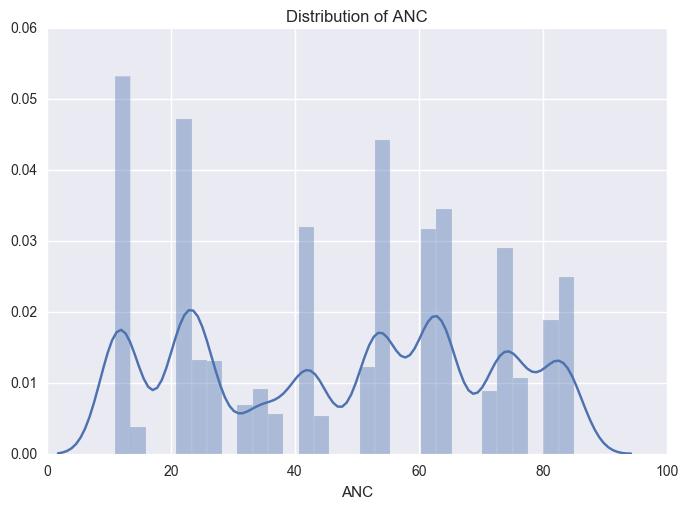

In [11]:
# examine what our data
print('Size of the dataset:', df.shape)
print('Number of unique ANC types:', len(df.ANC.unique()))

print('')
print('ANC Percentage')
y_series = pd.Series(y)
y_tot = y_series.count()
y_grp = y_series.groupby(y_series)
y_pct = y_grp.count() / y_tot * 100.
print(y_pct)
print('Mean: {}, Standard deviaion: {}'.format(y_pct.mean(), y_pct.std()))

# plot distribution
ax = sns.distplot(y)
plt.title('Distribution of ANC')
plt.show()

### Classification base accuracy

Our accuracy is very high as you might expect since the data directly maps to an ANC.

In [12]:
# leveraging concept from 06 Classification notebook
yhat = np.zeros(y.shape)

# classifier                           
clf = RandomForestClassifier(n_estimators=200,
                             n_jobs=-1, class_weight='balanced')

skf = StratifiedKFold(n_splits=10, random_state=0)

acc = cross_val_score(clf, X=X_transformed, y=y, cv=skf)

print('Average accuracy =', acc.mean()*100, '+/-', acc.std()*100)

Average accuracy = 99.8732733595 +/- 0.371183751959


[Back to Top](#Navigation "Navigation")

### Base visualization

Use a joint plot to view unemployment v. housing prices. Pearson correlation of .86 tells us the data is highly correlated. When housing prices are low, unemployment is higher.

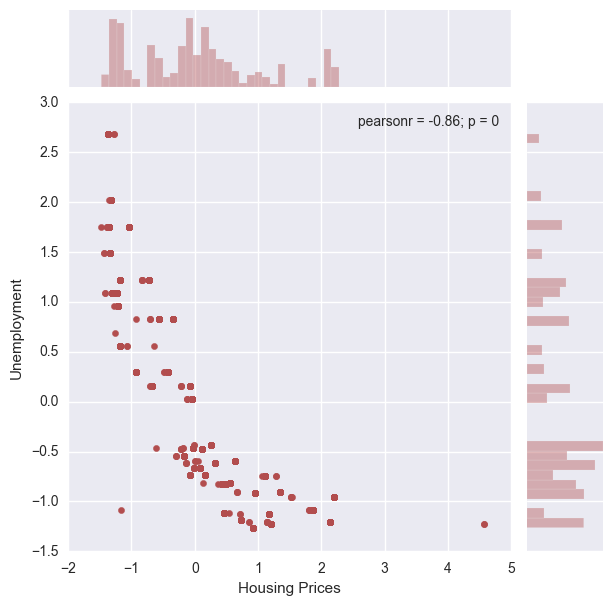

In [13]:
sns.set_palette("Set1", 8, .5)

X1 = X_transformed

ax = sns.jointplot(x=X1[:, 0], y=X1[:, 1])
ax.set_axis_labels(xlabel='Housing Prices', ylabel='Unemployment')
plt.show()

## Clustering

Code adapted from 09. Clustering Discretization, 10. Clustering Validity, and assignment 4 notebooks.

In [14]:
from sklearn import metrics


def eval_cluster(labels, labels_true):
    '''
    Evaluate the cluster outputting the estimated number of clusters given the labels, the homogeneity of the cluster,
    completeness of the cluster, harmonic mean between homogeneity and completeness, adjusted rand index, and
    adjusted mutual information score.
    
    :param label: the cluster labels
    :param label_true: the true labels
    :return: None
    '''
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
    
def plot_cluster(data, feature, xlabel, ylabel):
    '''
    Plot the custer results
    
    :param data: transformed X data
    :param feature: the features for the cluster
    :param xlabel: the description for the x axis
    :param ylabel: the description for the y axis
    :return: None
    '''
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1]+np.random.random(X1[:, 1].shape)/2, c=feature, 
                cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show() 
    
def store_best_result(data, acc, attribs):
    '''
    Helper method to store a list of results
    
    :param data: the dict to store the data
    :param acc: the cross validation accuracy
    :param attribs: the attribute list and value to store
    :return: mean and standard deviation
    '''
    mean = acc.mean()*100
    std = acc.std()*100
    
    if data['acc']<(mean+std):
        data['acc'] = (mean + std)
        for k, v in attribs.iteritems():
            data[k] = v
    return mean, std

[Back to Top](#Navigation "Navigation")

### Mini Batch KMeans

In [15]:
from sklearn.cluster import MiniBatchKMeans

kmeans_best_result = {'acc':0, 'clusters':0}
for clusters in range(53, 58):
    cls = MiniBatchKMeans(n_clusters=clusters, init='k-means++', random_state=1)
    cls.fit(X_transformed)
    X_new = pd.get_dummies(cls.labels_)
    
    acc = cross_val_score(clf, X=X_new, y=y, cv=skf)

    mean, std = store_best_result(kmeans_best_result, acc, {'clusters':clusters})
    print('KMeans: clusters =',  clusters, ', average accuracy =', mean, '+/-', std)

print('best clusters =', kmeans_best_result['clusters'])

KMeans: clusters = 53 , average accuracy = 99.8348154058 +/- 0.451958114467
KMeans: clusters = 54 , average accuracy = 99.8265486657 +/- 0.476663133235
KMeans: clusters = 55 , average accuracy = 99.8237930856 +/- 0.484900299382
KMeans: clusters = 56 , average accuracy = 99.7937220391 +/- 0.511749058167
KMeans: clusters = 57 , average accuracy = 99.7856055077 +/- 0.501457379613
best clusters = 55


#### Visualize best cluster for Mini Batch KMeans

Clusters: 55
Estimated number of clusters: 42
Homogeneity: 0.997
Completeness: 0.997
V-measure: 0.997
Adjusted Rand Index: 0.996
Adjusted Mutual Information: 0.997


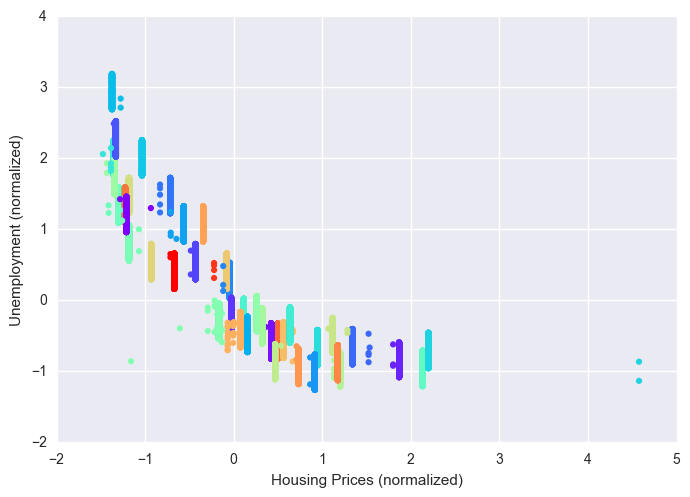

In [17]:
clusters = kmeans_best_result['clusters']
print('Clusters:', clusters)

cls = MiniBatchKMeans(n_clusters=clusters, init='k-means++', random_state=1)
cls.fit(X_transformed)

eval_cluster(cls.labels_, y)
plot_cluster(X_transformed, cls.labels_, 'Housing Prices (normalized)', 'Unemployment (normalized)')

[Back to Top](#Navigation "Navigation")

### Agglomerative

In [18]:
from sklearn.cluster import AgglomerativeClustering


agg_best_result = {'acc':0, 'link':None, 'clusters':0}
for link in ['ward', 'complete', 'average']:
    for clusters in range(44, 48):

        # append on the clustering
        cls = AgglomerativeClustering(n_clusters=clusters, linkage=link)
        cls.fit(X_transformed)
        X_new = pd.get_dummies(cls.labels_)

        acc = cross_val_score(clf, X=X_new, y=y, cv=skf)
        
        mean, std = store_best_result(agg_best_result, acc, {'clusters':clusters, 'link':link})
        print('Agglomerative: clusters =',  clusters, ', link =', link, ', average accuracy =', mean, '+/-', std)
        
print('best clusters =', agg_best_result['clusters'], ', link = ', agg_best_result['link'])       

Agglomerative: clusters = 44 , link = ward , average accuracy = 99.8157666795 +/- 0.447247900634
Agglomerative: clusters = 45 , link = ward , average accuracy = 99.8157666795 +/- 0.447247900634
Agglomerative: clusters = 46 , link = ward , average accuracy = 99.8047443593 +/- 0.479442872192
Agglomerative: clusters = 47 , link = ward , average accuracy = 99.7937220391 +/- 0.511749058167
Agglomerative: clusters = 44 , link = complete , average accuracy = 86.0022647881 +/- 1.10753207694
Agglomerative: clusters = 45 , link = complete , average accuracy = 84.8167553934 +/- 1.08869132365
Agglomerative: clusters = 46 , link = complete , average accuracy = 84.5402289125 +/- 0.768827872159
Agglomerative: clusters = 47 , link = complete , average accuracy = 86.1976388358 +/- 1.01907013879
Agglomerative: clusters = 44 , link = average , average accuracy = 82.4157184919 +/- 2.12484159526
Agglomerative: clusters = 45 , link = average , average accuracy = 82.3250207002 +/- 1.38747286585
Agglomerative

#### Visualize best cluster for Agglomerative Clustering

Clusters: 47
Link: ward
Estimated number of clusters: 47
Homogeneity: 0.998
Completeness: 0.996
V-measure: 0.997
Adjusted Rand Index: 0.997
Adjusted Mutual Information: 0.996


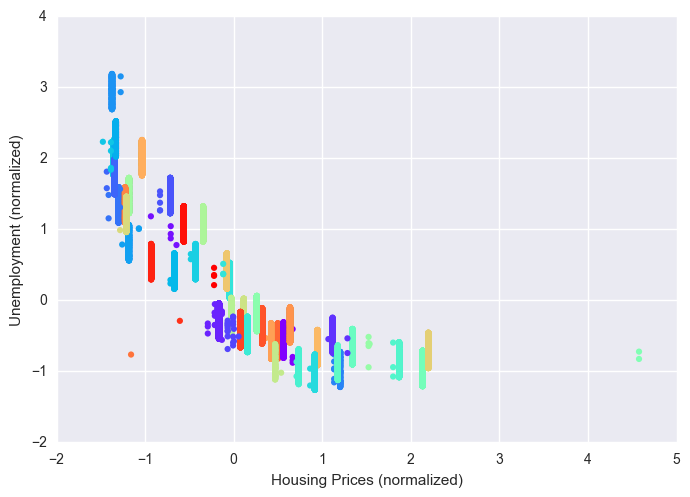

In [19]:
clusters = agg_best_result['clusters']
link = agg_best_result['link']
print('Clusters:', clusters)
print('Link:', link)

cls = AgglomerativeClustering(n_clusters=clusters, linkage=link)
cls.fit(X_transformed)

eval_cluster(cls.labels_, y)
plot_cluster(X_transformed, cls.labels_, 'Housing Prices (normalized)', 'Unemployment (normalized)')

[Back to Top](#Navigation "Navigation")

### DBSCAN

Code adopted from `scikit-learn` demo page.

In [20]:
from sklearn.cluster import DBSCAN

db_best_result = {'acc':0, 'clusters':0, 'eps':0, 'min_samples':0}
for eps in [0.001, 0.01, .1]:
    for min_samples in [2, 3, 4]:
        cls = DBSCAN(eps=eps, min_samples=min_samples)
        cls.fit(X_transformed)

        X_new = pd.get_dummies(cls.labels_)

        acc = cross_val_score(clf, X=X_new, y=y, cv=skf)

        labels = cls.labels_
        clusters = len(set(labels)) - (1 if -1 in labels else 0)
        mean, std = store_best_result(db_best_result, acc, {'clusters':clusters, 'eps':eps, 
                                                            'min_samples':min_samples})
        print('DBSCAN: clusters =',  clusters, ', eps =', eps, ', min_samples =', min_samples,
              ', average accuracy =', mean, '+/-', std)
    
print('best clusters =', db_best_result['clusters'], ', eps = ', db_best_result['eps'],
      ', min_samples =', db_best_result['min_samples'])  

DBSCAN: clusters = 68 , eps = 0.001 , min_samples = 2 , average accuracy = 99.7030282315 +/- 0.720623786991
DBSCAN: clusters = 54 , eps = 0.001 , min_samples = 3 , average accuracy = 99.7030282315 +/- 0.720623786991
DBSCAN: clusters = 50 , eps = 0.001 , min_samples = 4 , average accuracy = 99.7030282315 +/- 0.720623786991
DBSCAN: clusters = 68 , eps = 0.01 , min_samples = 2 , average accuracy = 99.7166859647 +/- 0.709081341155
DBSCAN: clusters = 54 , eps = 0.01 , min_samples = 3 , average accuracy = 99.7166859647 +/- 0.709081341155
DBSCAN: clusters = 50 , eps = 0.01 , min_samples = 4 , average accuracy = 99.7166859647 +/- 0.709081341155
DBSCAN: clusters = 46 , eps = 0.1 , min_samples = 2 , average accuracy = 92.6495304426 +/- 1.51847806067
DBSCAN: clusters = 42 , eps = 0.1 , min_samples = 3 , average accuracy = 92.5863038954 +/- 1.79675547638
DBSCAN: clusters = 40 , eps = 0.1 , min_samples = 4 , average accuracy = 92.1128439151 +/- 0.977145665752
best clusters = 68 , eps =  0.01 , min_

#### Visualize best cluster for DBSCAN

eps: 0.01
min_samples: 2
Estimated number of clusters: 68
Homogeneity: 1.000
Completeness: 0.994
V-measure: 0.997
Adjusted Rand Index: 0.997
Adjusted Mutual Information: 0.994


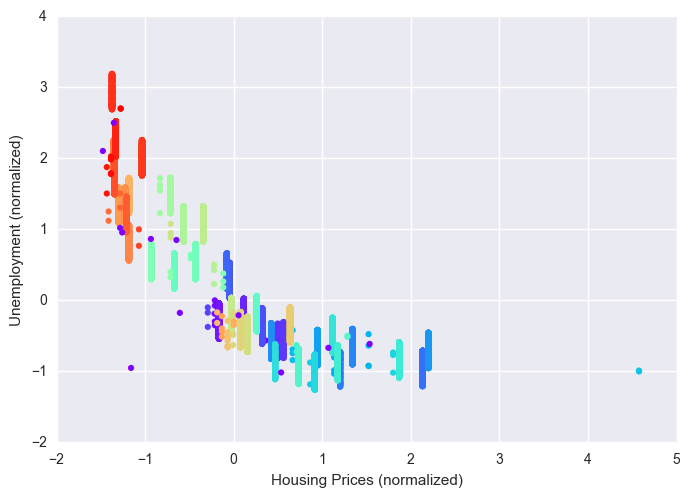

In [21]:
eps = db_best_result['eps']
min_samples = db_best_result['min_samples']
print('eps:', eps)
print('min_samples:', min_samples)

cls = DBSCAN(eps=eps, min_samples=min_samples)
cls.fit(X_transformed)

eval_cluster(cls.labels_, y)
plot_cluster(X_transformed, cls.labels_, 'Housing Prices (normalized)', 'Unemployment (normalized)')

#### Comparison of cluster visual plots
1. Not Clustered
2. Mini Batch KMeans
3. Agglomerative
4. DBSCAN

From the visualization of the clustering, there is not obvious clustering pattern. Because of such a high baseline accuracy, the lowest clusters of 47 by Agglogermative is a little more than half of the ANC neighborhoods.

A more interesting analysis would be to cluster the kind of crime based on circumstantial evidence reported.

![Clusters Comparisons](images/cluster_comparison.png "Comparison of Clusters") 

[Back to Top](#Navigation "Navigation")